In [17]:
from msmbuilder.example_datasets import AlanineDipeptide, FsPeptide, MetEnkephalin
ala = AlanineDipeptide().get()
fs = FsPeptide().get()
met = MetEnkephalin().get()

loading trajectory_1.xtc...
loading trajectory_10.xtc...
loading trajectory_11.xtc...
loading trajectory_12.xtc...
loading trajectory_13.xtc...
loading trajectory_14.xtc...
loading trajectory_15.xtc...
loading trajectory_16.xtc...
loading trajectory_17.xtc...
loading trajectory_18.xtc...
loading trajectory_19.xtc...
loading trajectory_2.xtc...
loading trajectory_20.xtc...
loading trajectory_21.xtc...
loading trajectory_22.xtc...
loading trajectory_23.xtc...
loading trajectory_24.xtc...
loading trajectory_25.xtc...
loading trajectory_26.xtc...
loading trajectory_27.xtc...
loading trajectory_28.xtc...
loading trajectory_3.xtc...
loading trajectory_4.xtc...
loading trajectory_5.xtc...
loading trajectory_6.xtc...
loading trajectory_7.xtc...
loading trajectory_8.xtc...
loading trajectory_9.xtc...


In [19]:
systems=[ala,fs,met]

In [4]:
from msmbuilder import featurizer
df = featurizer.DihedralFeaturizer()

In [37]:
from msmbuilder.decomposition import tICA
tica = tICA(2,50,weighted_transform=True)

In [38]:
dihedral_traj = df.fit_transform(systems[2].trajectories)
tica_traj = tica.fit_transform(dihedral_traj)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

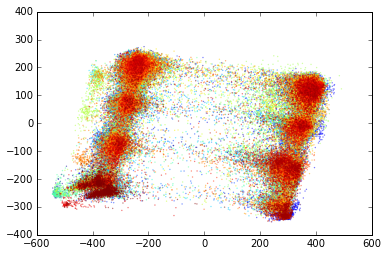

In [43]:
plt.scatter(np.vstack(tica_traj)[:,0],np.vstack(tica_traj)[:,1],c=np.arange(len(np.vstack(tica_traj))),
           linewidths=0,alpha=0.5,s=2)

In [70]:
from msmbuilder.cluster import MiniBatchKMeans
mini_kmeans=MiniBatchKMeans(9)
tica_clusters = mini_kmeans.fit_transform(tica_traj)

In [71]:
np.hstack(tica_clusters).shape

(99916,)

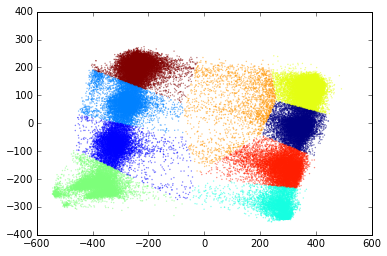

In [72]:
plt.scatter(np.vstack(tica_traj)[:,0],np.vstack(tica_traj)[:,1],c=np.hstack(tica_clusters),
           linewidths=0,alpha=0.5,s=2)

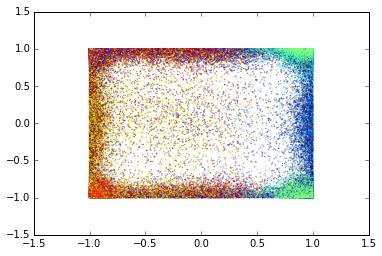

In [73]:
plt.scatter(np.vstack(dihedral_traj)[:,0],np.vstack(dihedral_traj)[:,1],
            #c=np.arange(len(np.vstack(tica_traj))),
            c=np.hstack(tica_clusters),
           linewidths=0,alpha=0.5,s=2)

In [53]:
dihedral_traj[0].shape,np.vstack(dihedral_traj).shape

((9979, 16), (99916, 16))

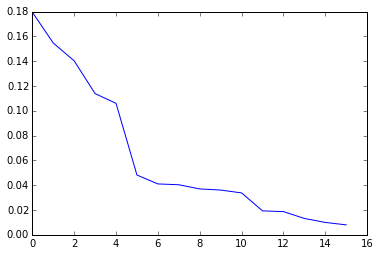

In [54]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(np.vstack(dihedral_traj))
plt.plot(pca.explained_variance_ratio_)

In [60]:
import mdp
xsfa_input = PCA(10).fit_transform(np.vstack(dihedral_traj))
#xsfa_input = np.vstack(dihedral_traj)
xsfa_traj=mdp.nodes.XSFANode(output_dim=2,dtype='float64')(xsfa_input)

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/mdp/nodes/expansion_nodes.py:85: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  factor = prec[lens[j]:, :]
/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages

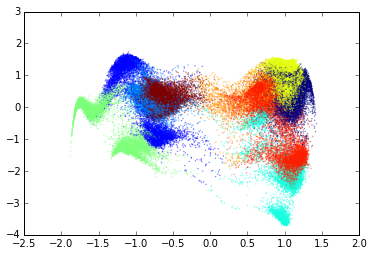

In [74]:
plt.scatter(xsfa_traj[:,0],xsfa_traj[:,1],
            c=np.hstack(tica_clusters),
           linewidths=0,alpha=0.5,s=2)

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_traj = PolynomialFeatures()